<a href="https://colab.research.google.com/github/namgisung/chemistry-project/blob/master/molecular%20structure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

원자 간 거리:
[1.0925256878902208, 1.0925256878902208, 1.0925256878902208, 1.0925256878902208, 1.7840869774761545, 1.7840869774761545, 1.7840869774761545, 1.7840869774761545, 1.7840869774761545, 1.7840869774761545]
총 에너지: 4268 kJ/mol


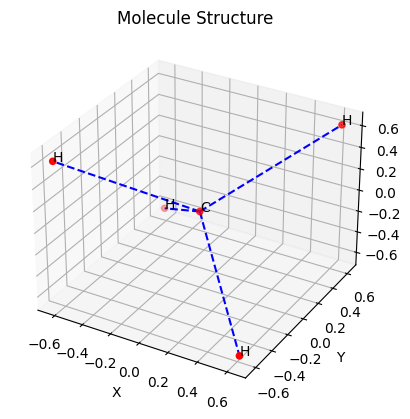

원자 간 거리:
[0.9558162127208347, 0.9558162127208347, 1.5147]
총 에너지: 1362 kJ/mol


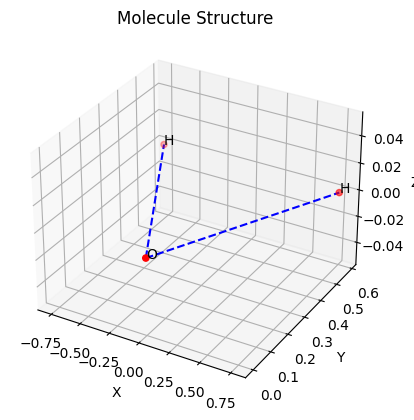

원자 간 거리:
[0.93247, 0.931344552354283, 0.931344552354283, 1.6144387884648956, 1.6144387884648956, 1.61248]
총 에너지: 2481 kJ/mol


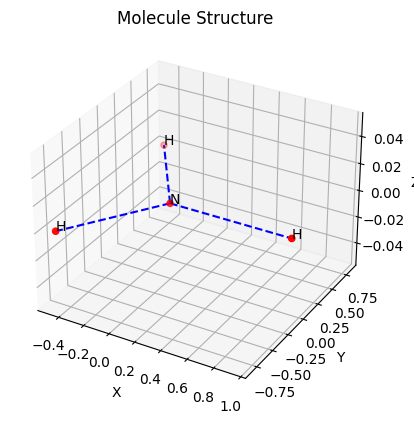

원자 간 거리:
[1.16, 1.16, 2.32]
총 에너지: 1308 kJ/mol


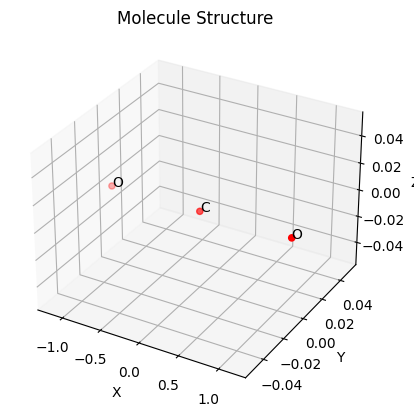

원자 간 거리:
[1.51, 2.5001799935204665, 2.5001799935204665, 1.0171037311896953, 1.0171037311896953, 2.7300183149568795, 2.7300183149568795, 1.3515176654413363, 1.3515176654413363, 1.332066064427737, 1.332066064427737, 1.9451735141112731, 1.9451735141112731, 2.3, 1.7311845655504212, 2.6542418879973995, 0.7810889834071404, 3.05026228380446, 2.6542418879973995, 1.7311845655504212, 3.05026228380446, 0.7810889834071404, 1.76, 1.77530279107537, 3.1312138221462935, 3.1312138221462935, 1.77530279107537, 3.78]
총 에너지: 12116 kJ/mol


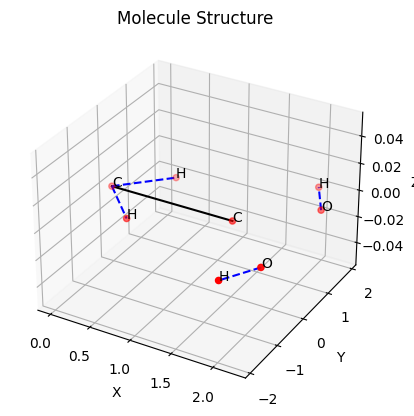

원자 간 거리:
[1.52, 2.5419087316424247, 1.0257680049601858, 1.0257680049601858, 2.8001785657346927, 2.8001785657346927, 2.7920064469839607, 1.4115594213493103, 1.3461797799699713, 1.3461797799699713, 2.040245083317198, 2.040245083317198, 1.3553228397691823, 1.7513708916160504, 2.722223356008834, 0.8127115109311545, 3.2205123815939602, 0.7669419795525605, 1.78, 1.8280043763623761, 3.2289317118824297, 2.2252415599210797, 3.2289317118824297, 1.8280043763623761, 2.682256512714621, 3.98, 1.5530936868070773, 2.7252339349127443]
총 에너지: 12116 kJ/mol


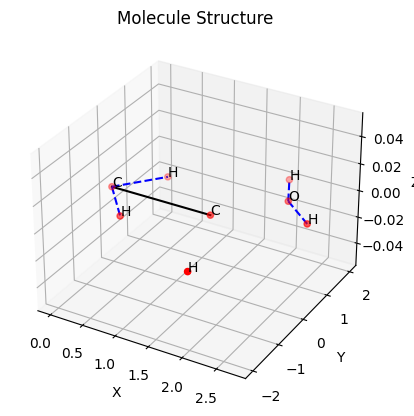

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_molecule(atoms, coordinates):
    # 원자 간 거리 계산
    def calculate_distance(coords1, coords2):
        return np.sqrt(np.sum((coords1 - coords2)**2))

    distances = []
    for i in range(len(coordinates)):
        for j in range(i+1, len(coordinates)):
            distances.append(calculate_distance(coordinates[i], coordinates[j]))

    print("원자 간 거리:")
    print(distances)

    # 간단한 에너지 계산
    bond_energies = {'C-H': 413, 'H-H': 436, 'O-H': 463, 'N-H': 391}
    total_energy = 0
    for distance in distances:
        if distance < 1.1:
            if atoms[0] == 'C':
                bond_type = 'C-H'
            elif atoms[0] == 'O':
                bond_type = 'O-H'
            elif atoms[0] == 'N':
                bond_type = 'N-H'
        else:
            bond_type = 'H-H'
        total_energy += bond_energies[bond_type]

    print("총 에너지:", total_energy, "kJ/mol")

    # 3D 플롯 생성
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # 원자 위치 플롯
    ax.scatter(coordinates[:,0], coordinates[:,1], coordinates[:,2], c='r', marker='o')

    # 원자 라벨 표시
    for i, atom in enumerate(atoms):
        ax.text(coordinates[i,0], coordinates[i,1], coordinates[i,2], atom)

    # 결합선 추가
    for i in range(len(coordinates)):
        for j in range(i+1, len(coordinates)):
            distance = calculate_distance(coordinates[i], coordinates[j])
            if atoms[i] == 'C' and atoms[j] == 'C':
                bond_length = 1.54  # C-C 결합 길이
            elif (atoms[i] == 'C' and atoms[j] == 'H') or (atoms[i] == 'H' and atoms[j] == 'C'):
                bond_length = 1.09  # C-H 결합 길이
            elif atoms[i] == 'O' and atoms[j] == 'H':
                bond_length = 0.96  # O-H 결합 길이
            elif atoms[i] == 'N' and atoms[j] == 'H':
                bond_length = 1.01  # N-H 결합 길이
            else:
                continue  # 다른 경우는 무시

            if distance < bond_length * 1.2:  # 결합 길이의 120% 이내
                if atoms[i] == 'H' or atoms[j] == 'H':
                    # 수소 결합
                    ax.plot([coordinates[i,0], coordinates[j,0]], [coordinates[i,1], coordinates[j,1]], [coordinates[i,2], coordinates[j,2]], color='b', linestyle='--')
                else:
                    # 공유 결합
                    ax.plot([coordinates[i,0], coordinates[j,0]], [coordinates[i,1], coordinates[j,1]], [coordinates[i,2], coordinates[j,2]], color='black', linestyle='-')

    # 축 라벨 설정
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Molecule Structure')

    plt.show()

# 예시: 메탄 분자
atoms = ['C', 'H', 'H', 'H', 'H']
coordinates = np.array([[0.0, 0.0, 0.0],
                       [0.63077, 0.63077, 0.63077],
                       [-0.63077, -0.63077, 0.63077],
                       [-0.63077, 0.63077, -0.63077],
                       [0.63077, -0.63077, -0.63077]])

plot_molecule(atoms, coordinates)

# 예시: 물 분자
atoms = ['O', 'H', 'H']
coordinates = np.array([[0.0, 0.0, 0.0],
                       [0.75735, 0.58310, 0.0],
                       [-0.75735, 0.58310, 0.0]])

plot_molecule(atoms, coordinates)

# 예시: 암모니아 분자
atoms = ['N', 'H', 'H', 'H']
coordinates = np.array([[0.0, 0.0, 0.0],
                       [0.93247, 0.0, 0.0],
                       [-0.46624, 0.80624, 0.0],
                       [-0.46624, -0.80624, 0.0]])

plot_molecule(atoms, coordinates)

# 예시: 이산화탄소 분자
atoms = ['C', 'O', 'O']
coordinates = np.array([[0.0, 0.0, 0.0],
                       [1.16, 0.0, 0.0],
                       [-1.16, 0.0, 0.0]])

plot_molecule(atoms, coordinates)

# 예시: 아세트산 분자
atoms = ['C', 'C', 'O', 'O', 'H', 'H', 'H', 'H']
coordinates = np.array([[0.0, 0.0, 0.0],
                       [1.51, 0.0, 0.0],
                       [2.22, 1.15, 0.0],
                       [2.22, -1.15, 0.0],
                       [0.51, 0.88, 0.0],
                       [0.51, -0.88, 0.0],
                       [1.97, 1.89, 0.0],
                       [1.97, -1.89, 0.0]])

plot_molecule(atoms, coordinates)

# 예시: 에탄올 분자
atoms = ['C', 'C', 'O', 'H', 'H', 'H', 'H', 'H']
coordinates = np.array([[0.0, 0.0, 0.0],
                       [1.52, 0.0, 0.0],
                       [2.23, 1.22, 0.0],
                       [0.51, 0.89, 0.0],
                       [0.51, -0.89, 0.0],
                       [1.97, 1.99, 0.0],
                       [1.97, -1.99, 0.0],
                       [2.72, 0.63, 0.0]])

plot_molecule(atoms, coordinates)